In [47]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [48]:
import tensorflow as tf

In [49]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras import Sequential, Input

In [50]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# assert x_train.shape == (60000, 28, 28)
# assert x_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)
# x_train

In [51]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [52]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

d:\Vs code\Projects\mnist data\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(optimizer="Adam",loss="SparseCategoricalCrossentropy",metrics=['Accuracy'])

In [54]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
import os

if os.path.exists('my_convo_model.keras'):
    model = tf.keras.models.load_model('my_convo_model.keras')
else:
    history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)
    model.save('my_convo_model.keras')  

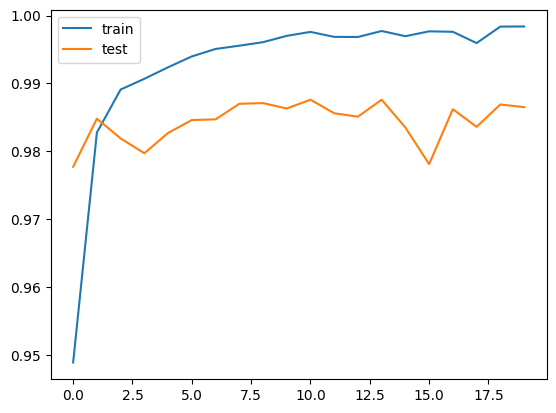

In [56]:
sns.lineplot(history.history['Accuracy'],label="train")
sns.lineplot(history.history['val_Accuracy'],label="test")
plt.legend()


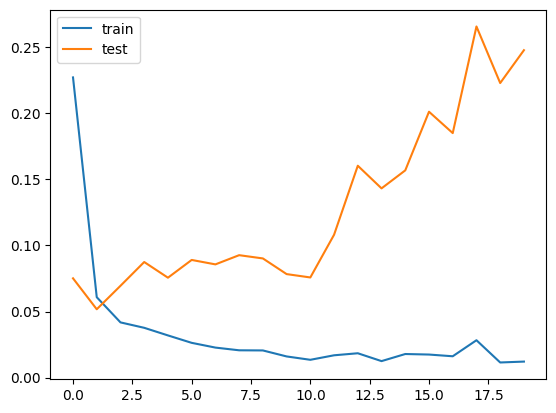

In [57]:
sns.lineplot(history.history['loss'],label="train")
sns.lineplot(history.history['val_loss'],label="test")
plt.legend()

(1, 28, 28, 1)

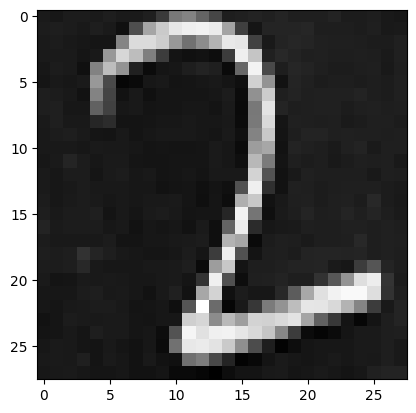

In [58]:
from PIL import Image, ImageOps

def prepare_image(image_path):
    # 1. Load the image
    img = Image.open(image_path)
    
    # 2. Convert to Grayscale ('L' mode)
    img = img.convert('L')
    
    # 3. Invert colors (If you wrote with Black pen on White paper)
    # Skip this if your image is already White text on Black background
    img = ImageOps.invert(img) 
    
    # 4. Resize to 28x28 pixels
    img = img.resize((28, 28))
    
    # 5. Convert to NumPy Array and Normalize (0 to 1)
    img_array = np.array(img, dtype="float32") / 255.0
    
    # 6. Reshape for the model (batch_size, 28, 28)
    img_array = img_array.reshape(1, 28, 28,1)
    plt.imshow(img_array[0], cmap='gray')
    return img_array

processed_data = prepare_image("2.png")
processed_data.shape

In [59]:
# Usage


In [60]:
prediction = model.predict(processed_data)
print(prediction)
print(f"I think this number is: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
[[3.9699753e-05 3.2194939e-03 9.9452484e-01 2.7986162e-04 7.1395881e-08
  6.5448347e-08 8.1266080e-07 1.9229933e-03 1.1412188e-05 7.5656777e-07]]
I think this number is: 2


In [61]:
# plt.imshow(img_array[0], cmap='gray')